In [ ]:
#Iniciando o projeto e criando os datasets para a criação da prova de conceito
import numpy
import pandas as pd

receitas = pd.read_csv("https://media.githubusercontent.com/media/PedroCosDi/ProjetoAplicadoMack3/main/Dataset/RAW_recipes.csv")

interacoes = pd.read_csv ("https://media.githubusercontent.com/media/PedroCosDi/ProjetoAplicadoMack3/main/Dataset/RAW_interactions.csv")

In [ ]:
#filtrando somente as colunas necessarias e renomeando o nome das variaveis de receitas
receitas = receitas[['id', 'name', 'minutes', 'n_ingredients']]

receitas.rename(columns={'id' : 'ID_RECEITA', 'name': 'NOME_RECEITA', 'minutes' : 'MINUTOS', 'n_ingredients': 'N_INGREDIENTES'}, inplace= True)
receitas.head()

In [ ]:
#filtrando somente as colunas necessarias e renomeando o nome das variaveis
interacoes = interacoes[['user_id', 'recipe_id', 'rating']]
interacoes.rename(columns={'user_id' : 'ID_USUARIO', 'recipe_id': 'ID_RECEITA', 'rating' : 'AVALIACAO'}, inplace= True)
interacoes.head()

<ipython-input-5-fd1204e8d572>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interacoes.rename(columns={'user_id' : 'ID_USUARIO', 'recipe_id': 'ID_RECEITA', 'rating' : 'AVALIACAO'}, inplace= True)


,ID_USUARIO,ID_RECEITA,AVALIACAO
0,38094,40893,4
1,1293707,40893,5
2,8937,44394,4
3,126440,85009,5
4,57222,85009,5


In [ ]:
print(interacoes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   ID_USUARIO  1132367 non-null  int64
 1   ID_RECEITA  1132367 non-null  int64
 2   AVALIACAO   1132367 non-null  int64
dtypes: int64(3)
memory usage: 25.9 MB
None


In [ ]:
#verificando se ha valores nulos
receitas.isna().sum()

ID_RECEITA        0
NOME_RECEITA      1
MINUTOS           0
N_INGREDIENTES    0
dtype: int64

In [ ]:
#Dropamos a linha de valor nulo (como sao poucos os valores nulos, iremos remover para não ter impacto algum)
receitas.dropna(inplace = True)


In [ ]:
#não há valores nulos em interacoes
interacoes.isna().sum()

ID_USUARIO    0
ID_RECEITA    0
AVALIACAO     0
dtype: int64

In [ ]:
#Verificamos quantidade de avaliações por usuario
interacoes['ID_USUARIO'].value_counts()

424680        7671
37449         5603
383346        4628
169430        4076
128473        3917
              ... 
244983           1
139446           1
495446           1
113469           1
2001868099       1
Name: ID_USUARIO, Length: 226570, dtype: int64

In [ ]:
#pegando o ID_USUARIO-somente de usuarios que fizeram mais de 100 avaliaçoes
qt_avaliacoes = interacoes['ID_USUARIO'].value_counts() > 100
id_relevante = qt_avaliacoes[qt_avaliacoes].index
id_relevante.shape

(1368,)

In [ ]:
#visualizando os usuarios selecionados
id_relevante

Int64Index([ 424680,   37449,  383346,  169430,  128473,   89831,   58104,
             133174,  199848,  305531,
            ...
             709541, 1182971, 1458294,  121684,  212417, 1020416,  804851,
             498487,  390058,    9580],
           dtype='int64', length=1368)

In [ ]:
#visualizando o tamanho do dataset qt_avaliaçoes
qt_avaliacoes.shape

(226570,)

In [ ]:
#pegando somente avaliaçoes dos usuarios que avaliaram mais de 100 vezes
interacoes = interacoes[interacoes['ID_USUARIO'].isin(id_relevante)]

In [ ]:
#visualizando o tamanho do dataset qt_avaliaçoes
qt_avaliacoes.shape

(226570,)

In [ ]:
#visualizando o dataframe qt_avaliaçoes
qt_avaliacoes.head()

424680    True
37449     True
383346    True
169430    True
128473    True
Name: ID_USUARIO, dtype: bool

In [ ]:
#visualizando o dataframe receitas
receitas.head()

,ID_RECEITA,NOME_RECEITA,MINUTOS,N_INGREDIENTES
0,137739,arriba baked winter squash mexican style,55,7
1,31490,a bit different breakfast pizza,30,6
2,112140,all in the kitchen chili,130,13
3,59389,alouette potatoes,45,11
4,44061,amish tomato ketchup for canning,190,8


In [ ]:
#verificando tipo de variável
print(receitas.info())
print()
print(interacoes.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231636 entries, 0 to 231636
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_RECEITA      231636 non-null  int64 
 1   NOME_RECEITA    231636 non-null  object
 2   MINUTOS         231636 non-null  int64 
 3   N_INGREDIENTES  231636 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 8.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510486 entries, 3 to 1132365
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   ID_USUARIO  510486 non-null  int64
 1   ID_RECEITA  510486 non-null  int64
 2   AVALIACAO   510486 non-null  int64
dtypes: int64(3)
memory usage: 15.6 MB
None


In [ ]:
#unindo os dois datasets (511886 linhas)
inter_receita = interacoes.merge(receitas, on = 'ID_RECEITA')
inter_receita

,ID_USUARIO,ID_RECEITA,AVALIACAO,NOME_RECEITA,MINUTOS,N_INGREDIENTES
0,126440,85009,5,baked potato toppings,10,13
1,57222,85009,5,baked potato toppings,10,13
2,52282,120345,4,sugared raspberries,10,2
3,124416,120345,0,sugared raspberries,10,2
4,76535,134728,4,kfc honey bbq strips,40,12
...,...,...,...,...,...,...
510481,39835,249924,5,rocky mount nc bbq chicken sandwiches,70,5
510482,496803,249924,5,rocky mount nc bbq chicken sandwiches,70,5
510483,169430,470995,5,perfectly fried shrimps with garlic,8,3
510484,1269180,257796,4,slow cooker garlic chicken with rosemary,440,9


In [ ]:
#removendo duplicidades de usuários que fizeram review de receitas duas vezes, note que não existe, e continuamos com o mesmo número de linhas
inter_receita.drop_duplicates(['ID_USUARIO', 'ID_RECEITA'], inplace = True)
inter_receita

,ID_USUARIO,ID_RECEITA,AVALIACAO,NOME_RECEITA,MINUTOS,N_INGREDIENTES
0,126440,85009,5,baked potato toppings,10,13
1,57222,85009,5,baked potato toppings,10,13
2,52282,120345,4,sugared raspberries,10,2
3,124416,120345,0,sugared raspberries,10,2
4,76535,134728,4,kfc honey bbq strips,40,12
...,...,...,...,...,...,...
510481,39835,249924,5,rocky mount nc bbq chicken sandwiches,70,5
510482,496803,249924,5,rocky mount nc bbq chicken sandwiches,70,5
510483,169430,470995,5,perfectly fried shrimps with garlic,8,3
510484,1269180,257796,4,slow cooker garlic chicken with rosemary,440,9


In [ ]:
inter_receita.shape

(510486, 6)

In [ ]:
#verificando novamente se ha valores nulos com a junçao dos dataframes
inter_receita.isna().sum()

ID_USUARIO        0
ID_RECEITA        0
AVALIACAO         0
NOME_RECEITA      0
MINUTOS           0
N_INGREDIENTES    0
dtype: int64

In [ ]:
#visualizando as primeiras 20 linhas do arquivo
inter_receita.head(20)

,ID_USUARIO,ID_RECEITA,AVALIACAO,NOME_RECEITA,MINUTOS,N_INGREDIENTES
0,126440,85009,5,baked potato toppings,10,13
1,57222,85009,5,baked potato toppings,10,13
2,52282,120345,4,sugared raspberries,10,2
3,124416,120345,0,sugared raspberries,10,2
4,76535,134728,4,kfc honey bbq strips,40,12
5,255338,134728,5,kfc honey bbq strips,40,12
6,136726,197160,5,mexican hots,20,10
7,68960,200236,4,lamb stew with tomatoes chickpeas and spices,150,16
8,353579,225241,5,chicken tamale pie for 2 ww core,45,16
9,900992,225241,3,chicken tamale pie for 2 ww core,45,16


In [ ]:
#descartando valores duplicados para que nao tenhamos problemas de termos o mesmo usuario avaliando a mesma receita diversas vezes
inter_receita.drop_duplicates(['ID_USUARIO', 'ID_RECEITA'], inplace= True)

In [ ]:
#visualizando se houve alteraao na quantidade de registros
inter_receita.shape

(510486, 6)

In [ ]:
#removendo o ID_RECEITA, pois será recomendado a receita pelo nome da receita
del inter_receita['ID_RECEITA']

In [ ]:
inter_receita.head()

,ID_USUARIO,AVALIACAO,NOME_RECEITA,MINUTOS,N_INGREDIENTES
0,126440,5,baked potato toppings,10,13
1,57222,5,baked potato toppings,10,13
2,52282,4,sugared raspberries,10,2
3,124416,0,sugared raspberries,10,2
4,76535,4,kfc honey bbq strips,40,12


In [ ]:
#criando um dataset com as receitas como linhas e os usuários como colunas(fazendo pivot para que cada ID_USUARIO seja uma variavel com o
#respectivo valor de avaliaçao para cada receita avaliada)

receita_nota = inter_receita.pivot_table(columns = 'ID_USUARIO', index = 'NOME_RECEITA', values = 'AVALIACAO')
receita_nota

ID_USUARIO,1533,1535,2310,2312,3288,4291,4439,4470,4740,5060,...,2206637,2324285,2399085,2549237,2597942,1800054678,1802849661,2000431901,2000498330,2001102678
NOME_RECEITA,,,,,,,,,,,,,,,,,,,,,
0 fat chunky watermelon salsa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 point soup ww,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 point soup crock pot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007 martini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007 cocktail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zydeco sauce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zydeco shrimp wrap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zydeco soup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#preenchendo os valores nulos com zero
receita_nota = inter_receita.pivot_table(columns = 'ID_USUARIO', index = 'NOME_RECEITA', values = 'AVALIACAO',fill_value=0)
receita_nota


ID_USUARIO,1533,1535,2310,2312,3288,4291,4439,4470,4740,5060,...,2206637,2324285,2399085,2549237,2597942,1800054678,1802849661,2000431901,2000498330,2001102678
NOME_RECEITA,,,,,,,,,,,,,,,,,,,,,
0 fat chunky watermelon salsa,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0 point soup ww,0,5,0,0.0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
0 point soup crock pot,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
007 martini,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
007 cocktail,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zydeco sauce,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zydeco shrimp wrap,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zydeco soup,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#importando csr_matrix(pacote Scipy)- método para criar uma matrix sparsa
from scipy.sparse import csr_matrix

#transformando nosso dataset em uma matriz sparsa
receita_nota_sparsa = csr_matrix(receita_nota)



In [ ]:
#importando o algoritmo KNN do Scikit Learn
from sklearn.neighbors import NearestNeighbors



In [ ]:
#criando e treinando o modelo preditivo

modelo = NearestNeighbors(algorithm = 'brute')
modelo.fit(receita_nota_sparsa)

NearestNeighbors(algorithm='brute')

In [ ]:
#fazendo previsoes de receitas: baked chicken puff

distances, sugestions = modelo.kneighbors(receita_nota.filter(items= ['lemonade made with stevia'], axis = 0).values.reshape(1, -1))

for i in range(len(sugestions)):
  print(receita_nota.index[sugestions[i]])
  print(distances)

Index(['lemonade made with stevia', 'cheese enchiladas with green sauce',
       'simple bean soup with ham bone', 'bevie s hurry up dessert',
       'butter rum bonnie cake'],
      dtype='object', name='NOME_RECEITA')
[[ 0.         10.44030651 11.18033989 11.18033989 11.18033989]]


In [ ]:
#fazendo previsoes de receitas: french strawberry crepes

distances, sugestions = modelo.kneighbors(receita_nota.filter(items= ['almond cupcakes'], axis = 0).values.reshape(1, -1))

for i in range(len(sugestions)):
  print(receita_nota.index[sugestions[i]])

Index(['almond cupcakes', 'indian chicken meatballs and lentil stew',
       'fawhopper  4ww points', 'gingerbread breakfast loaf',
       'baked ziti  5 ww points'],
      dtype='object', name='NOME_RECEITA')


In [ ]:
#teste
distances, sugestions = modelo.kneighbors(receita_nota.filter(items= ['007 cocktail'], axis = 0).values.reshape(1, -1))

for i in range(len(sugestions)):
  print(receita_nota.index[sugestions[i]])
  print(distances)

Index(['hg s pizza pizza egg mug', 'fast fiesta dip',
       'mustard and mustard chicken thighs', 'beefy pumpkin   pasta soup',
       'potato salad with ham'],
      dtype='object', name='NOME_RECEITA')
[[0. 0. 0. 0. 0.]]


In [ ]:
distances, sugestions = modelo.kneighbors(receita_nota.filter(items= ['lamb and feta rissoles'], axis = 0).values.reshape(1, -1))

for i in range(len(sugestions)):
  print(receita_nota.index[sugestions[i]])
  print(distances)


Index(['bountiful barley', 'polenta with italian sausage', 'asian noodle soup',
       'zingy black beans   rice', 'mussels  pipies  in black beans'],
      dtype='object', name='NOME_RECEITA')
[[0. 0. 0. 0. 0.]]


In [ ]:
#importando novos pacotes

In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#formando clusters para KMeans
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []


In [ ]:
#inicializando o KMeans
Kmeans = KMeans(n_clusters= num_clusters)
Kmeans.fit(receita_nota_sparsa)
cluster_labels = Kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#silhouette score
silhouette_avg.append(silhouette_score(receita_nota_sparsa, cluster_labels))

ValueError: ignored

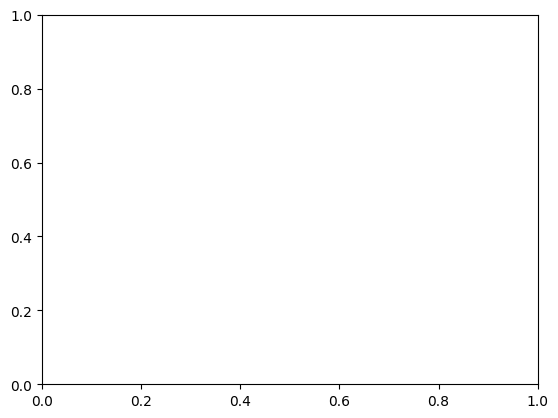

In [ ]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Score da Silhueta')
plt.title('Analise da Silhueta para o melhor K')
plt.show()

In [ ]:
"""
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
"""
X = receita_nota

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 7.009533283460928
2 : 6.967610393682593
3 : 6.889465209815298
4 : 6.837356877271886
5 : 6.824310253641382
6 : 6.78476965808138
7 : 6.84229225030918
8 : 6.822036245224072
9 : 6.731361765466381


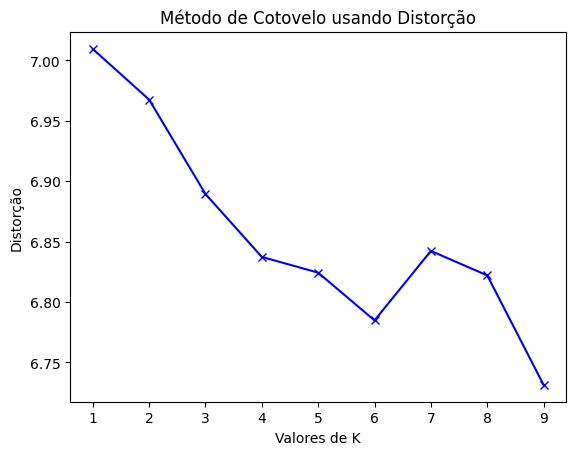

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distorção')
plt.title('Método de Cotovelo usando Distorção')
plt.show()

In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 11257201.103195839
2 : 11134171.1079792
3 : 10995108.13213588
4 : 10878507.398464425
5 : 10850699.183758333
6 : 10761099.404639341
7 : 10829383.13409797
8 : 10809584.396081205
9 : 10647846.236514632


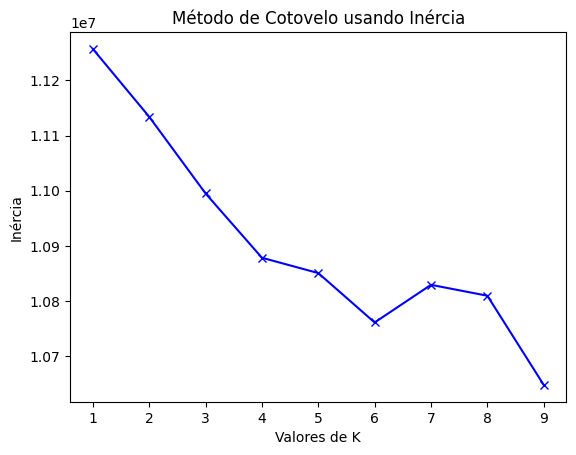

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Inércia')
plt.title('Método de Cotovelo usando Inércia')
plt.show()

In [ ]:
1 : 11257201.103195839
2 : 11097612.875810089
3 : 10970491.515952397
4 : 10898903.193420874
5 : 10837861.782322917
6 : 10783103.641227854
7 : 10802767.798928354
8 : 10727953.534321371
9 : 10630296.569618434

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

import scipy.cluster.hierarchy as shc

kmeans.cluster_centers_

NameError: ignored

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage='single',compute_distances=True).fit(receita_nota)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
clustering_model.distances_